# Principal Component Analysis

Up until this point, you've seen supervised machine learning algorithms; you provide the algorithm with labeled target data whether numerical or categorical which the algorithm then learns to predict given some other set of features for a given observation. Principal Component Analysis (PCA) is a little different. It is what is known as an unsupervised [machine] learning algorithm. Unsupervised learning algorithms simply transform existing data based on its structure into new useful representations which can then feed into a larger data pipeline. 

PCA reorientates data onto new feature dimensions which account for the maximum amount of variance amongst the observation features. These feature dimensions correspond to the eigenvectors of the covariance matrix of the original dataset. This allows you to reduce the dimension of the dataset while also preserving as much statistical information (variance) inherent in the data.

The primary reason for performing dimensionality reduction is the **curse of dimensionality**. While more features will typically add to the performance of a supervised machine learning model, as you add more and more features, the volume of these n-dimensional spaces begins to grow exponentially. This means that these points in space are further and further from each other requiring more and more observations in order to train a model with more features. Principal Component Analysis can be used to reduce a large feature set to a smaller handful of meaningful features. Admittedly however, the new features, or principal components, as it were, are less directly interpretable from an analysis point of view.   

Some other examples of unsupervised algorithms include:
    * Clustering (KMeans, Hierarchical Agglomerative Clustering, etc.)
    * Dimensionality Reduction (PCA, Singular Value Decomposition (SVD))
    * Generative Modeling

If you want to really dig into your linear algebra background, here's another resource on the calculation of eigenvectors:  
* [FINDING EIGENVALUES AND EIGENVECTORS](https://www.scss.tcd.ie/~dahyotr/CS1BA1/SolutionEigen.pdf)

First, to see PCA in practice, we'll load the famous iris dataset from scikit-learn and then take a look at how to implement PCA.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()

X = iris.data
y = iris.target
columns = iris.feature_names
df = pd.DataFrame(X)
df.columns = columns
df['Target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['Target'].value_counts()

2    50
1    50
0    50
Name: Target, dtype: int64

Before we apply PCA, let's take a look at how seperal the classes are based on the raw features present.

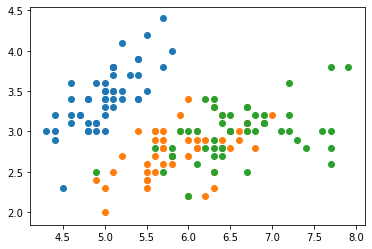

In [4]:
for target in df.Target.unique():
    temp = df[df.Target == target]
    plt.scatter(temp['sepal length (cm)'], temp['sepal width (cm)'])

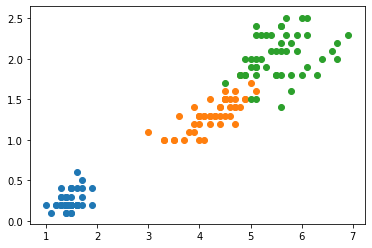

In [6]:
for target in df.Target.unique():
    temp = df[df.Target == target]
    plt.scatter(temp['petal length (cm)'], temp['petal width (cm)'])

## Fitting a PCA Model

In [7]:
pca = PCA(n_components=4)
X_transformed = pca.fit_transform(X)

## Inspecting the Explained Variance of the Principal Components

Remember that PCA decomposes the original dataset into principal components which attempt to encapsulate the maximum amount of information as defined by the maximum variance across observations. With this, it is useful to investigate how much variance in the dataset is accounted for in the  first $n$ components. While you will the same number of principal components as you have original features to account for **all** of the variance in a dataset (assuming you don't have redundant features), the first few principal components will typically account for the vast majority of the variance.

sci-kit learn makes this very easy using the `expalined_variance_ratio_` attribute of the instantiated PCA model object.

In [8]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

You can also then chain on the `.cumsum()` method to see the total variance accounted for from the first $n$ components.

In [9]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

As you can see, the first component accounts for over 92% of the total variance, and the first two components account for over 97%.

## Pandas Practice Review

Transform the PCA features displayed above into a Pandas DataFrame and append these updated feature spaces to the original dataset to create a master dataset which includes the original features  as well as the principal components associated with each observation.

In [11]:
df_transformed = pd.DataFrame(X_transformed)
df_transformed.columns = ['PC1', 'PC2', 'PC3', 'PC4']
df_transformed.head()

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


In [14]:
df_transformed['Target'] = df['Target']

In [15]:
df_transformed.head(2)

,PC1,PC2,PC3,PC4,Target
0,-2.684126,0.319397,-0.027915,-0.002262,0
1,-2.714142,-0.177001,-0.210464,-0.099027,0


## Visualizing updated feature spaces

Great! Now that you have the updated DataFrame which includes the principal components, apply a similar procedure as above to visualize a scatter plot of the first two principal components and the separation of the three classes.

In [12]:
import seaborn as sns

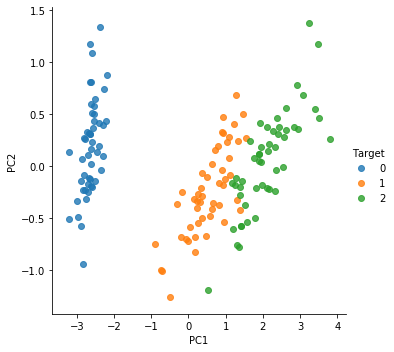

In [19]:
sns.lmplot(x = 'PC1', y = 'PC2', data = df_transformed, hue = 'Target', fit_reg = False)

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

In [21]:
svc_raw = SVC()

In [24]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [25]:
X = df.drop('Target', axis = 1)
y = df['Target']

In [26]:
cv = cross_validate(svc_raw, X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto'

In [28]:
cv['test_score'].mean()

0.9734477124183006

In [29]:
svc_pca= SVC()

In [36]:
X = df_transformed.drop(['Target', 'PC3', 'PC4'], axis = 1)
y = df_transformed['Target']

In [37]:
cv = cross_validate(svc_pca, X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto'

In [38]:
cv['test_score'].mean()

0.9669117647058822

## Pros 
- reduce dimensions without droping data
- sometimes give you better results
- faster train time

## Cons
- lose interpretability 

> **References**  
http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#pca-vs-lda